# Data Science project - Binance API

### Setup

In [75]:
apikey = '__your_api_key__'
secret = '__your_secret_api__'

### Import/Install dependencies

In [2]:
# !pip install python-binance mplfinance

In [5]:
import pandas as pd
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

### Authenticate 

In [6]:
client = Client(apikey, secret)

### Get Tickers

In [36]:
tickers = client.get_all_tickers()
tickers[:10]

[{'symbol': 'ETHBTC', 'price': '0.05263600'},
 {'symbol': 'LTCBTC', 'price': '0.00226000'},
 {'symbol': 'BNBBTC', 'price': '0.01050400'},
 {'symbol': 'NEOBTC', 'price': '0.00044100'},
 {'symbol': 'QTUMETH', 'price': '0.00254000'},
 {'symbol': 'EOSETH', 'price': '0.00086200'},
 {'symbol': 'SNTETH', 'price': '0.00002475'},
 {'symbol': 'BNTETH', 'price': '0.00051800'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00012470'}]

In [10]:
tickers_df = pd.DataFrame(tickers)

In [11]:
tickers_df.set_index('symbol', inplace=True)

In [33]:
tickers_df.head(10)

,price
symbol,
ETHBTC,0.05259400
LTCBTC,0.00226100
BNBBTC,0.01050000
NEOBTC,0.00044100
QTUMETH,0.00254000
EOSETH,0.00086100
SNTETH,0.00002475
BNTETH,0.00051800
BCCBTC,0.07908100


### Get depth

In [15]:
depth = client.get_order_book(symbol='ETHBTC')


In [16]:
depth_df = pd.DataFrame(depth['bids'])
depth_df.columns = ['Price', 'Volume']
print(depth_df.dtypes)
depth_df.head()

Price     object
Volume    object
dtype: object


,Price,Volume
0,0.05256900,7.81980000
1,0.05256700,2.50000000
2,0.05256600,3.81900000
3,0.05256500,13.17620000
4,0.05256400,0.07930000


### Get historical data

In [18]:
client.get_historical_klines??

In [19]:
historical = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_1DAY, '15 Jun 2021')

In [23]:
historical[:2]

[[1623715200000,
  '2580.58000000',
  '2640.00000000',
  '2507.70000000',
  '2543.54000000',
  '599826.64933000',
  1623801599999,
  '1548303436.06276510',
  1044834,
  '296745.76720000',
  '766423377.38332160',
  '0'],
 [1623801600000,
  '2543.55000000',
  '2556.19000000',
  '2351.18000000',
  '2367.89000000',
  '624741.78358000',
  1623887999999,
  '1533734359.41300690',
  896073,
  '284039.92262000',
  '698017754.35405180',
  '0']]

In [24]:
hist_df = pd.DataFrame(historical)
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1623715200000,2580.58000000,2640.00000000,2507.70000000,2543.54000000,599826.64933000,1623801599999,1548303436.06276510,1044834,296745.76720000,766423377.38332160,0
1,1623801600000,2543.55000000,2556.19000000,2351.18000000,2367.89000000,624741.78358000,1623887999999,1533734359.41300690,896073,284039.92262000,698017754.35405180,0
2,1623888000000,2368.02000000,2460.50000000,2306.00000000,2373.28000000,560667.58566000,1623974399999,1338389545.00148260,961448,270180.83506000,645226707.83642750,0
3,1623974400000,2373.28000000,2378.00000000,2139.00000000,2234.09000000,778905.20197000,1624060799999,1758827532.88334170,1067542,371196.26583000,838571112.17782590,0
4,1624060800000,2234.09000000,2278.82000000,2161.67000000,2164.67000000,496872.24997000,1624147199999,1104923869.41859910,763820,247263.46485000,550102564.55565630,0


In [25]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1623715200000,2580.58000000,2640.00000000,2507.70000000,2543.54000000,599826.64933000,1623801599999,1548303436.06276510,1044834,296745.76720000,766423377.38332160,0
1,1623801600000,2543.55000000,2556.19000000,2351.18000000,2367.89000000,624741.78358000,1623887999999,1533734359.41300690,896073,284039.92262000,698017754.35405180,0
2,1623888000000,2368.02000000,2460.50000000,2306.00000000,2373.28000000,560667.58566000,1623974399999,1338389545.00148260,961448,270180.83506000,645226707.83642750,0
3,1623974400000,2373.28000000,2378.00000000,2139.00000000,2234.09000000,778905.20197000,1624060799999,1758827532.88334170,1067542,371196.26583000,838571112.17782590,0
4,1624060800000,2234.09000000,2278.82000000,2161.67000000,2164.67000000,496872.24997000,1624147199999,1104923869.41859910,763820,247263.46485000,550102564.55565630,0


### Preprocess Historical Data

In [26]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [27]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time'] / 1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time'] / 1000, unit='s')

In [28]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
363,2022-06-13,1434.84000000,1455.00000000,1165.45000000,1209.82000000,3626351.66536000,2022-06-13 23:59:59.999000064,4611744120.81747040,3047112,1791798.24942000,2278239124.08762710,0
364,2022-06-14,1209.35000000,1268.45000000,1075.80000000,1208.90000000,2716493.80131000,2022-06-14 23:59:59.999000064,3217818700.12419390,2225812,1348790.33831000,1598488294.15623550,0
365,2022-06-15,1208.90000000,1250.00000000,1014.40000000,1237.52000000,3114823.13621000,2022-06-15 23:59:59.999000064,3493040697.13765710,2868796,1545969.74767000,1735187764.94102600,0
366,2022-06-16,1237.53000000,1257.85000000,1051.55000000,1068.50000000,1447386.83040000,2022-06-16 23:59:59.999000064,1649596819.73423900,1443117,712044.85730000,812156334.52252500,0
367,2022-06-17,1068.50000000,1118.00000000,1051.11000000,1079.26000000,1109696.32710000,2022-06-17 23:59:59.999000064,1208385034.91104500,1012068,555232.21940000,604687190.79754700,0


In [29]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1) ### Swtich to numeric value

In [30]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,368.000000,368.000000,368.000000,368.000000,3.680000e+02,3.680000e+02,3.680000e+02,3.680000e+02,3.680000e+02
mean,3059.379864,3151.651060,2948.278804,3055.299076,5.892562e+05,1.651200e+09,1.027721e+06,2.932696e+05,8.224912e+08
std,805.403493,819.851704,789.114943,811.601727,3.738570e+05,7.037802e+08,4.621175e+05,1.851449e+05,3.492606e+08
min,1068.500000,1118.000000,1014.400000,1068.500000,1.541439e+05,4.707147e+08,2.980000e+05,7.693798e+04,2.332485e+08
25%,2518.697500,2608.030000,2394.222500,2513.997500,3.788866e+05,1.202276e+09,7.253100e+05,1.926184e+05,6.039820e+08
50%,3050.555000,3159.260000,2950.105000,3050.475000,5.043959e+05,1.494633e+09,9.270965e+05,2.512092e+05,7.453950e+08
75%,3578.027500,3680.960000,3442.555000,3578.035000,6.821720e+05,1.930592e+09,1.201358e+06,3.418723e+05,9.630109e+08
max,4807.980000,4868.000000,4713.890000,4807.980000,3.626352e+06,4.611744e+09,3.047112e+06,1.791798e+06,2.287434e+09


### Vizualization 

In [31]:
import mplfinance as mpf

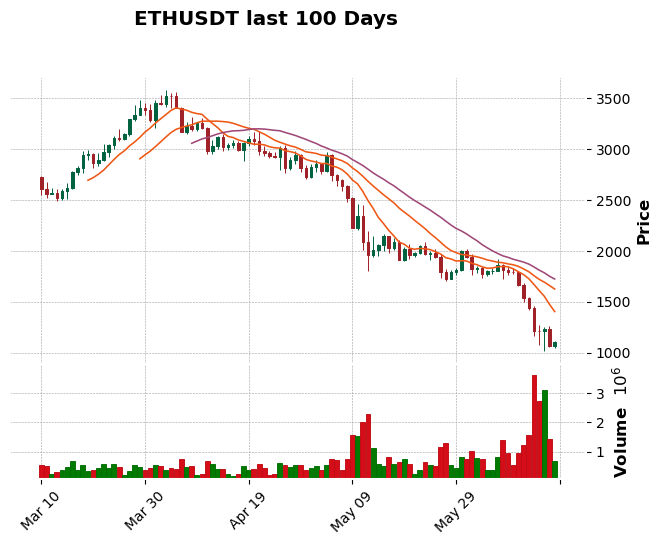

In [70]:
mpf.plot(hist_df.set_index('Close Time').tail(100), type='candle', style='charles', volume=True, title= "ETHUSDT last 100 Days", mav=(10,20, 30))

In [43]:
historical = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '15 Jun 2021')
hist_df = pd.DataFrame(historical)
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time'] / 1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time'] / 1000, unit='s')
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

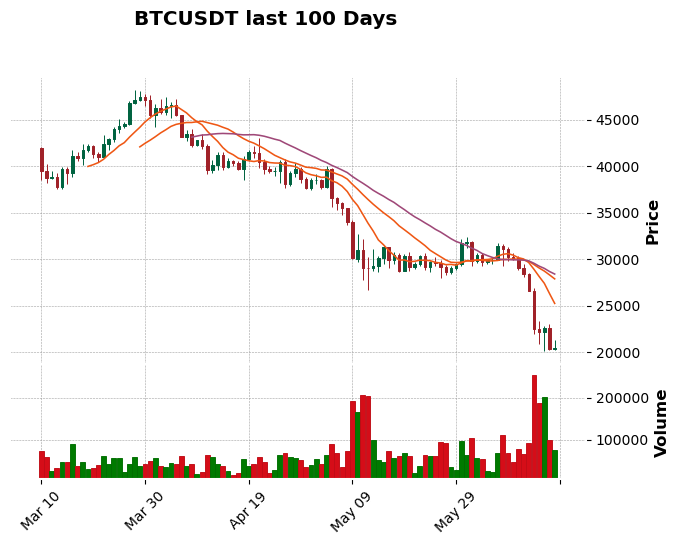

In [44]:
mpf.plot(hist_df.set_index('Close Time').tail(100), type='candle', style='charles', volume=True, title= "BTCUSDT last 100 Days", mav=(10,20, 30))

In [45]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2021-06-15,40516.28,41330.00,39506.40,40144.04,80679.622838,2021-06-15 23:59:59.999000064,3.247747e+09,1931890,39428.829726,1.587382e+09,0
1,2021-06-16,40143.80,40527.14,38116.01,38349.01,87771.976937,2021-06-16 23:59:59.999000064,3.450556e+09,2134897,42137.242251,1.657136e+09,0
2,2021-06-17,38349.00,39559.88,37365.00,38092.97,79541.307119,2021-06-17 23:59:59.999000064,3.065623e+09,1620210,37936.812673,1.462730e+09,0
3,2021-06-18,38092.97,38202.84,35129.29,35819.84,95228.042935,2021-06-18 23:59:59.999000064,3.507868e+09,1809253,44824.436567,1.651614e+09,0
4,2021-06-19,35820.48,36457.00,34803.52,35483.72,68712.449461,2021-06-19 23:59:59.999000064,2.453818e+09,1212278,33788.293345,1.207082e+09,0


### The highest number of trades for BTC

In [61]:
btc_h = hist_df.groupby('Number of Trades').max()
btc_h = btc_h[-50:]

##### Viz best fifty

In [64]:
mpf.plot??

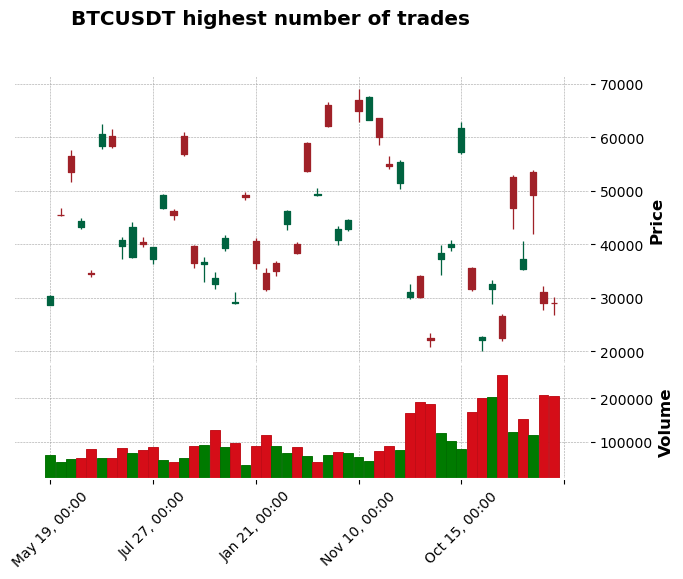

In [66]:
mpf.plot(btc_h.set_index('Open Time'), type='candle', style='charles',volume=True, title= "BTCUSDT highest number of trades")